In [1]:
import pandas as pd
import json
from tqdm import tqdm_notebook
import seaborn as sns
from utils import add_region
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
PATH = "../dados/brutos/casos_covid19_9julho2020.csv"

In [3]:
data_df = pd.read_csv(PATH)

In [4]:
data_df = add_region(data_df)
data_df.to_csv(PATH)

- Mapeados: 100%|██████████| 3318/3318 [00:00<00:00, 4456.88it/s]


In [5]:
data_df.tail()

,epi_week,date,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,region
3313,28,2020-07-08,Brazil,SC,TOTAL,12,432,1467,36810,432,36810,6.02949,513.76258,0.01174,28115.0,3899.0,143943.0,2009.03362,Sul
3314,28,2020-07-08,Brazil,SE,TOTAL,24,875,850,32490,875,32490,38.06506,1413.41004,0.02693,19759.0,9296.0,55826.0,2428.59430,Nordeste
3315,28,2020-07-08,Brazil,SP,TOTAL,313,16788,8657,341365,16788,341365,36.55999,743.40608,0.04918,199005.0,288903.0,1000000.0,2177.74545,Sudeste
3316,28,2020-07-08,Brazil,TO,TOTAL,0,233,0,13440,233,13440,14.81372,854.49110,0.01734,8517.0,3208.0,22854.0,1453.01634,Norte
3317,28,2020-07-08,Brazil,TOTAL,TOTAL,1132,68075,42531,1719285,67964,1713160,32.39397,818.13396,0.03959,1139844.0,817764.0,4287499.0,2040.23681,TOTAL


In [6]:
data_df.columns

Index(['epi_week', 'date', 'country', 'state', 'city', 'newDeaths', 'deaths',
       'newCases', 'totalCases', 'deathsMS', 'totalCasesMS',
       'deaths_per_100k_inhabitants', 'totalCases_per_100k_inhabitants',
       'deaths_by_totalCases', 'recovered', 'suspects', 'tests',
       'tests_per_100k_inhabitants', 'region'],
      dtype='object')

# Análise do Brasil

In [7]:
brasil_df = data_df[data_df["state"] == "TOTAL"]
brasil_df.set_index("date", inplace=True)
brasil_df.sort_index(inplace=True)

In [8]:
brasil_df.head()

,epi_week,country,state,city,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants,region
date,,,,,,,,,,,,,,,,,,
2020-02-25,9,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-26,9,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-27,9,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-28,9,Brazil,TOTAL,TOTAL,0,0,1,2,0,1,0.0,0.00095,0.0,NaN,NaN,NaN,NaN,TOTAL
2020-02-29,9,Brazil,TOTAL,TOTAL,0,0,0,2,0,2,0.0,0.00095,0.0,NaN,NaN,NaN,NaN,TOTAL


In [34]:
brasil_df[["totalCases", "deaths"]].to_csv("../dados/processados/serie_covid_brasil.csv")

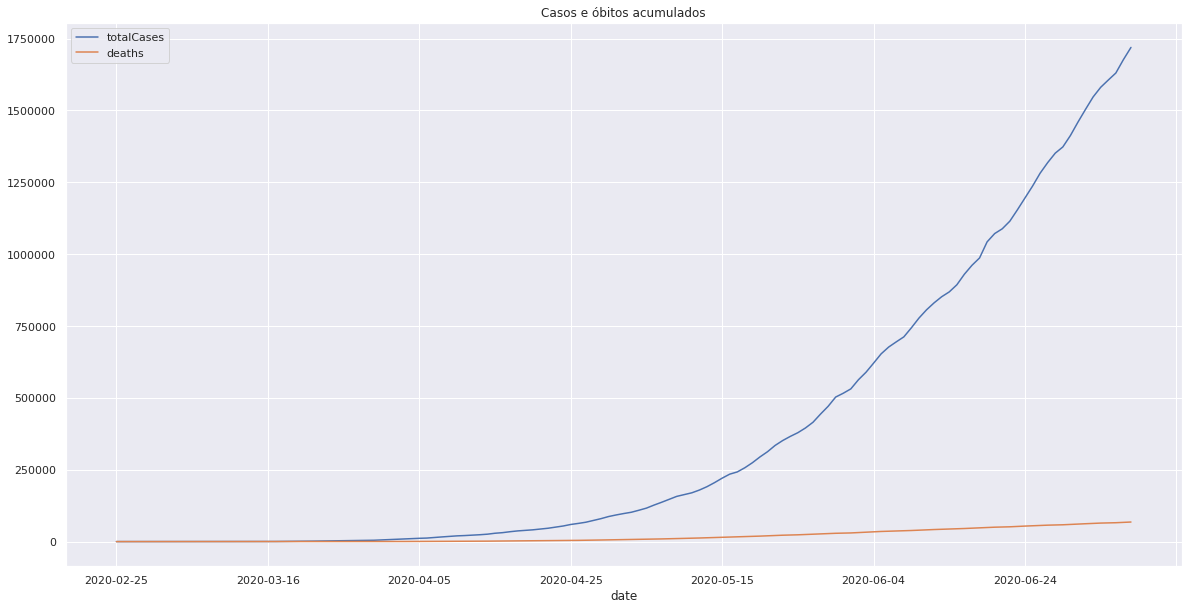

In [9]:
brasil_df[["totalCases", "deaths"]].plot(title="Casos e óbitos acumulados")

# Análise de estados

In [10]:
aux_df = data_df[data_df["state"] != "TOTAL"].groupby(["date", "state"]).sum()
aux_df.reset_index(inplace=True)

In [11]:
aux_df

,date,state,epi_week,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
0,2020-02-25,SP,9,0,0,1,1,0,0,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
1,2020-02-26,SP,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2,2020-02-27,SP,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
3,2020-02-28,SP,9,0,0,1,2,0,1,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
4,2020-02-29,SP,9,0,0,0,2,0,2,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3178,2020-07-08,RS,28,32,825,1757,35557,825,35557,7.25132,312.52749,0.02320,29424.0,3668.0,182819.0,1606.88371
3179,2020-07-08,SC,28,12,432,1467,36810,432,36810,6.02949,513.76258,0.01174,28115.0,3899.0,143943.0,2009.03362
3180,2020-07-08,SE,28,24,875,850,32490,875,32490,38.06506,1413.41004,0.02693,19759.0,9296.0,55826.0,2428.59430
3181,2020-07-08,SP,28,313,16788,8657,341365,16788,341365,36.55999,743.40608,0.04918,199005.0,288903.0,1000000.0,2177.74545


In [12]:
estados_df = aux_df.set_index("date").pivot(columns="state")

In [13]:
estados_df.tail()

epi_week                                                        \
state            AC    AL    AM    AP    BA    CE    DF    ES    GO    MA   
date                                                                        
2020-07-04     27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0  27.0   
2020-07-05     28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0   
2020-07-06     28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0   
2020-07-07     28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0   
2020-07-08     28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0  28.0   

            ... tests_per_100k_inhabitants                                     \
state       ...                         PR         RJ          RN          RO   
date        ...                                                                 
2020-07-04  ...                 1140.48006  871.36691  2221.50743  4380.25574   
2020-07-05  ...                 1109.11734  871.36691  2539.74147  4768.38892   
2020-07-06  ...                 1109.11734  871.36691  2539.74147  4768.38892   
2020-07-07  ...                 1109.11734  871.36691  2539.74147  4768.38892   
2020-07-08  ...                 1109.11734  871.36691  2539.74147  4768.38892   

                                                                        \
state               RR          RS          SC          SE          SP   
date                                                                     
2020-07-04  3710.04406  1426.42692  1438.99582  2223.91304  1311.83901   
2020-07-05  3710.04406  1606.88371  2009.03362  2428.59430  1311.83901   
2020-07-06  3710.04406  1606.88371  2009.03362  2428.59430  1311.83901   
2020-07-07  3710.04406  1606.88371  2009.03362  2428.59430  1311.83901   
2020-07-08  3710.04406  1606.88371  2009.03362  2428.59430  2177.74545   

                        
state               TO  
date                    
2020-07-04  1354.34296  
2020-07-05  1453.01634  
2020-07-06  1453.01634  
2020-07-07  1453.01634  
2020-07-08  1453.01634  

[5 rows x 378 columns]

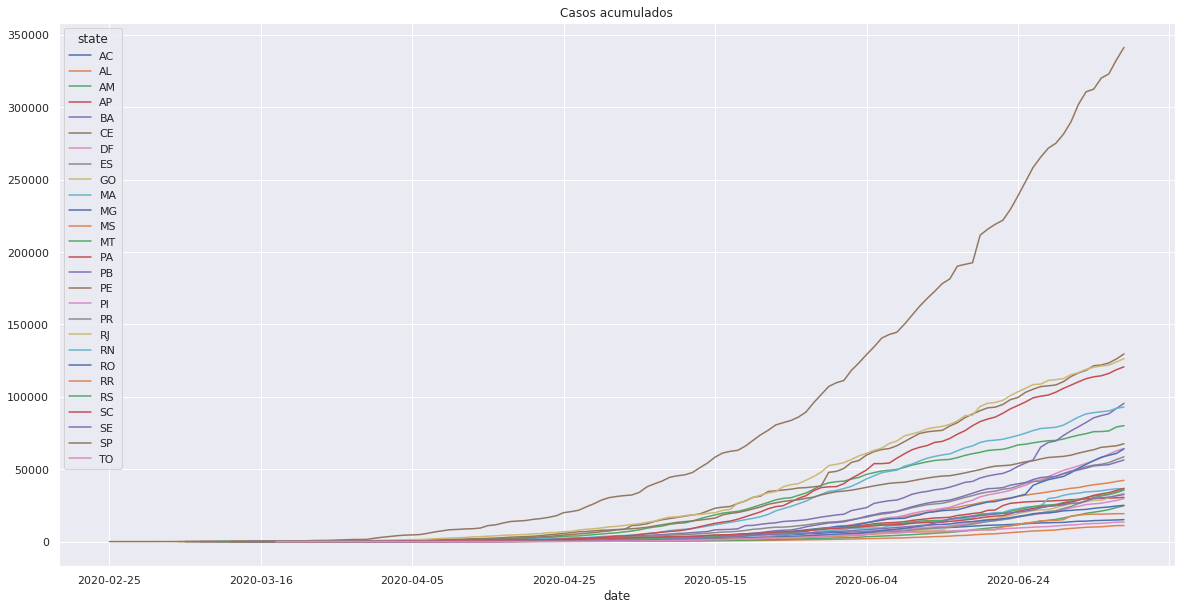

In [14]:
estados_df["totalCases"].plot(title="Casos acumulados")

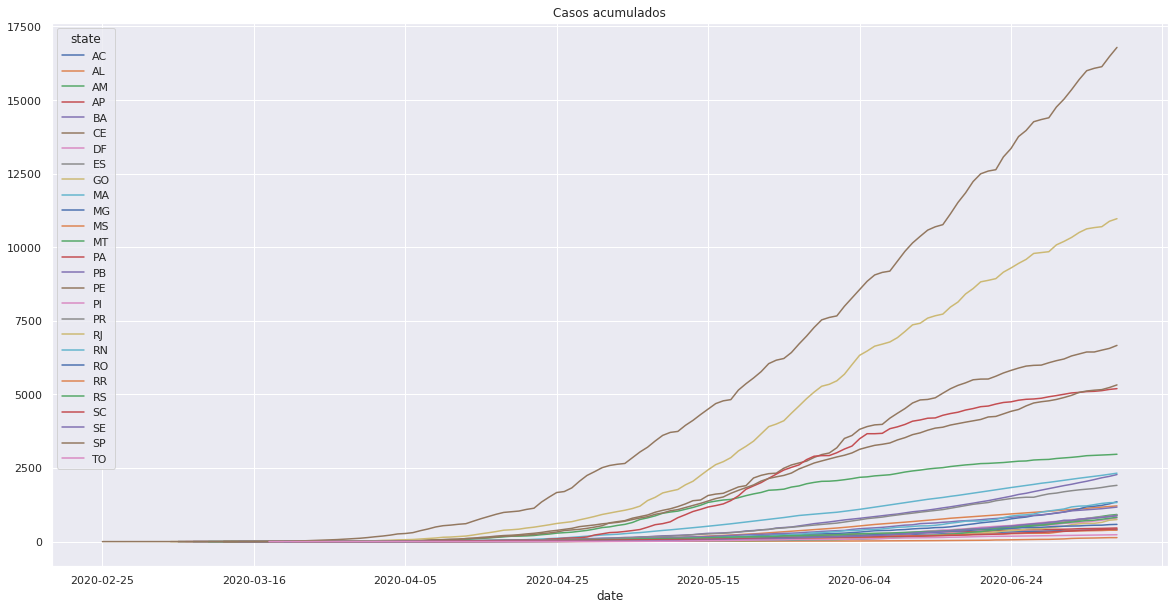

In [15]:
estados_df["deaths"].plot(title="Casos acumulados")

# Análise de regiões

In [16]:
regioes_df = data_df[data_df["region"] != "TOTAL"].groupby(["date", "region"]).sum()

In [17]:
regioes_df.tail(5)

epi_week  newDeaths  deaths  newCases  totalCases  \
date       region                                                        
2020-07-08 DF              28         34     801      1620       64314   
           Nordeste       252        395   22062     13884      583094   
           Norte          196         62   10233      3861      304295   
           Sudeste        112        506   31024     15872      590266   
           Sul             84         88    2152      4630      108082   

                     deathsMS  totalCasesMS  deaths_per_100k_inhabitants  \
date       region                                                          
2020-07-08 DF             801         64314                     26.56480   
           Nordeste     22032        580628                    345.33323   
           Norte        10206        302308                    343.87302   
           Sudeste      31024        590266                    154.05336   
           Sul           2152        108082                     21.10837   

                     totalCases_per_100k_inhabitants  deaths_by_totalCases  \
date       region                                                            
2020-07-08 DF                             2132.94473               0.01245   
           Nordeste                      10116.23529               0.32155   
           Norte                         14112.89247               0.18257   
           Sudeste                        3234.24491               0.18983   
           Sul                            1138.64912               0.06000   

                     recovered  suspects      tests  \
date       region                                     
2020-07-08 DF          50879.0   12634.0   267307.0   
           Nordeste   392401.0  254607.0  1397203.0   
           Norte      227474.0   12684.0   516643.0   
           Sudeste    383576.0  407812.0  1511575.0   
           Sul         67391.0   12979.0   453578.0   

                     tests_per_100k_inhabitants  
date       region                                
2020-07-08 DF                        8865.11580  
           Nordeste                 24252.56620  
           Norte                    25721.00501  
           Sudeste                   7147.63962  
           Sul                       4725.03467

In [18]:
# Indexando apenas pela data
regioes_df = regioes_df.reset_index().set_index("date")

In [19]:
regioes_df

,region,epi_week,newDeaths,deaths,newCases,totalCases,deathsMS,totalCasesMS,deaths_per_100k_inhabitants,totalCases_per_100k_inhabitants,deaths_by_totalCases,recovered,suspects,tests,tests_per_100k_inhabitants
date,,,,,,,,,,,,,,,
2020-02-25,Sudeste,9,0,0,1,1,0,0,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2020-02-26,Sudeste,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2020-02-27,Sudeste,9,0,0,0,1,0,1,0.00000,0.00218,0.00000,0.0,0.0,0.0,0.00000
2020-02-28,Sudeste,9,0,0,1,2,0,1,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
2020-02-29,Sudeste,9,0,0,0,2,0,2,0.00000,0.00436,0.00000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-08,DF,28,34,801,1620,64314,801,64314,26.56480,2132.94473,0.01245,50879.0,12634.0,267307.0,8865.11580
2020-07-08,Nordeste,252,395,22062,13884,583094,22032,580628,345.33323,10116.23529,0.32155,392401.0,254607.0,1397203.0,24252.56620
2020-07-08,Norte,196,62,10233,3861,304295,10206,302308,343.87302,14112.89247,0.18257,227474.0,12684.0,516643.0,25721.00501


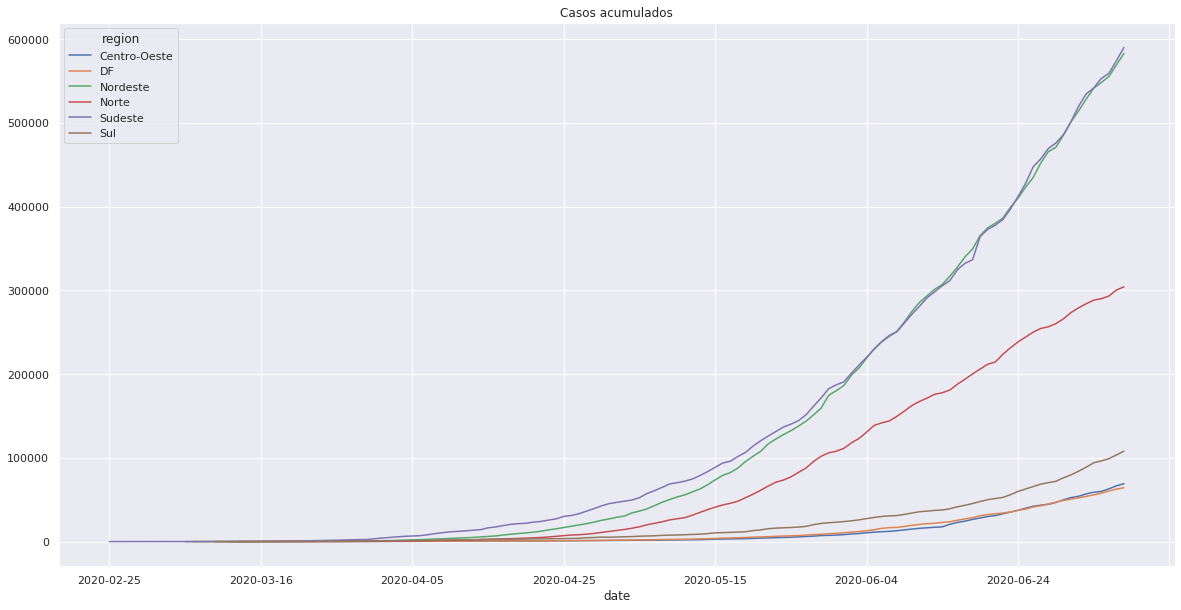

In [20]:
final_reg_df = regioes_df.pivot(columns="region")
final_reg_df["totalCases"].plot(title="Casos acumulados")

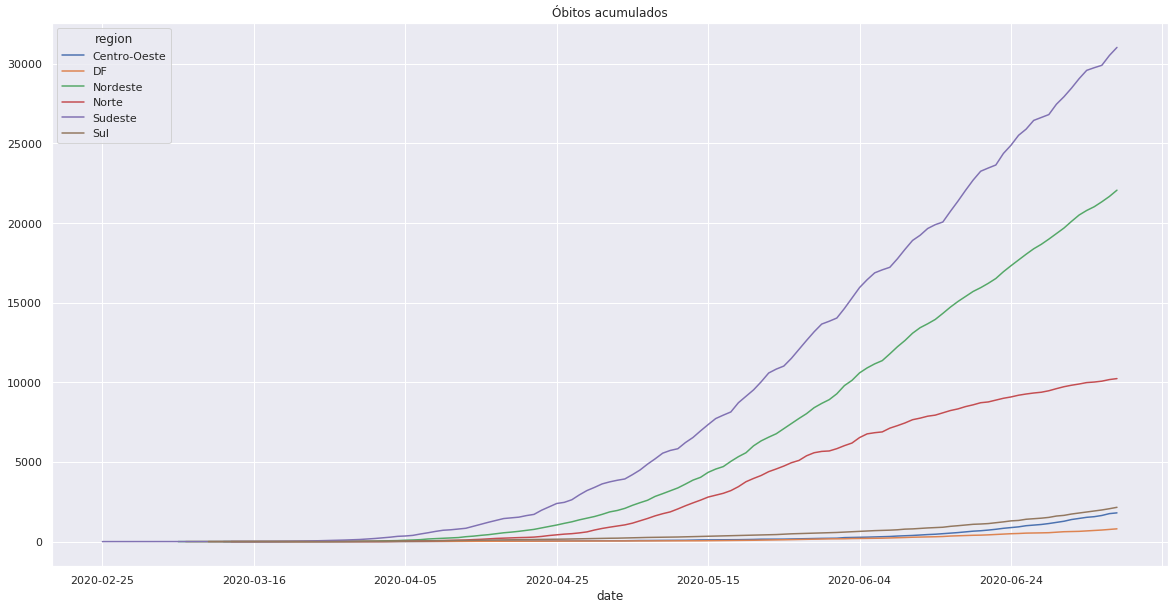

In [21]:
final_reg_df["deaths"].plot(title="Óbitos acumulados")

# Visualização dos dados mais recentes

In [22]:
final_reg_df.iloc[-1]["totalCases"]

region
Centro-Oeste     69234.0
DF               64314.0
Nordeste        583094.0
Norte           304295.0
Sudeste         590266.0
Sul             108082.0
Name: 2020-07-08, dtype: float64

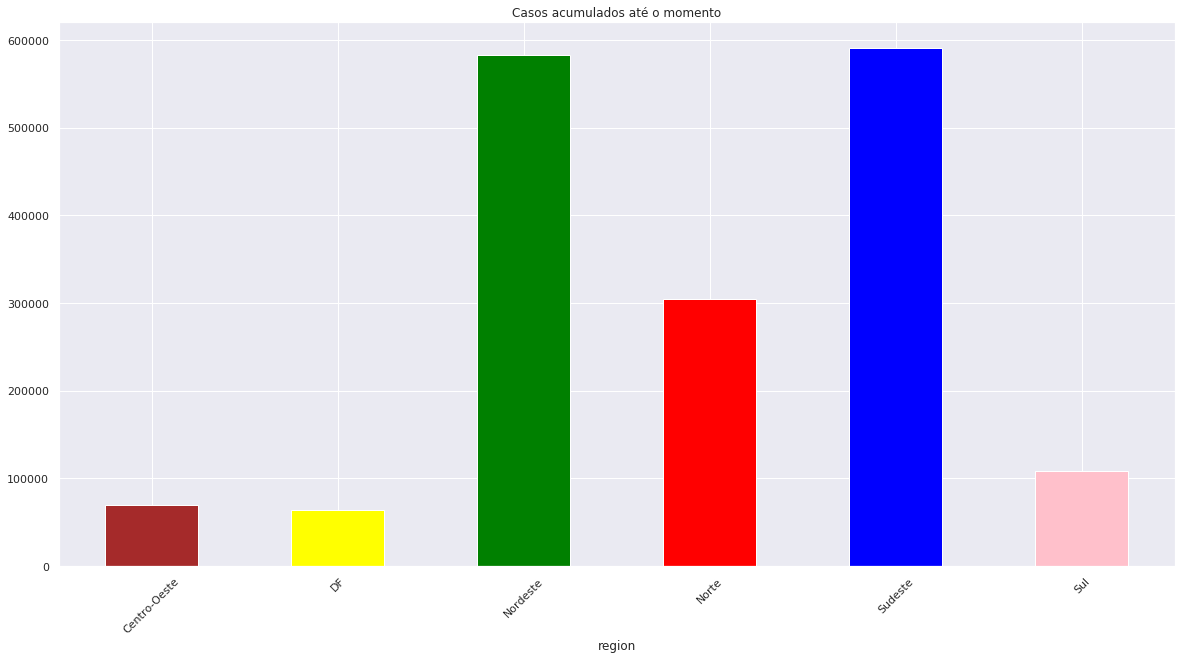

In [23]:
final_reg_df.iloc[-1]["totalCases"].plot.bar(rot=45, color=["brown", "yellow", "green", "red", "blue", "pink"], title="Casos acumulados até o momento")

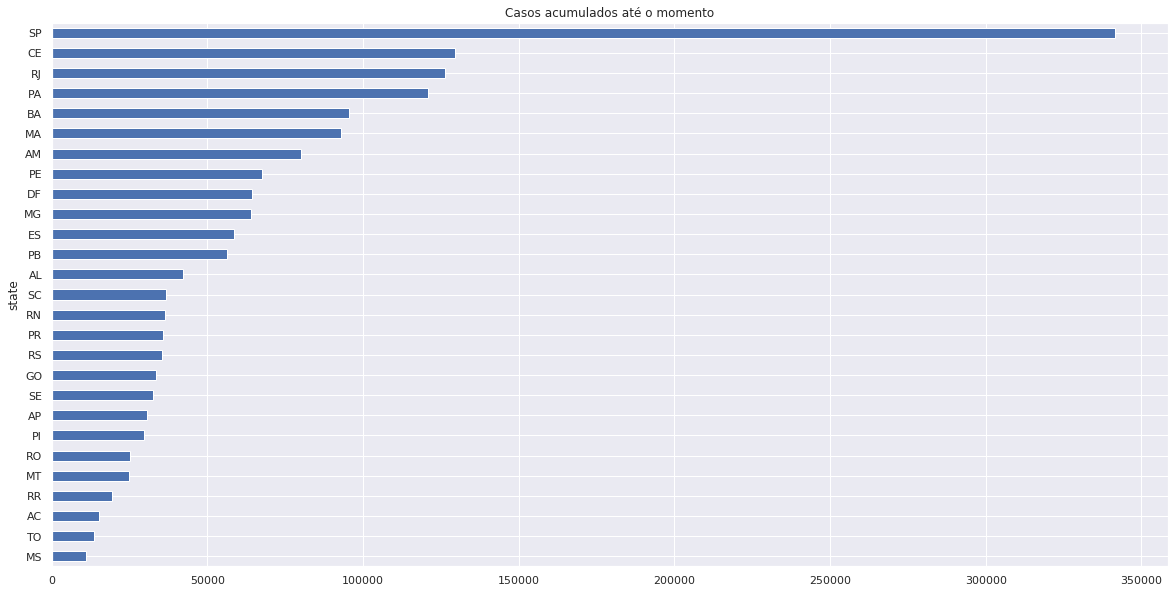

In [24]:
estados_df.iloc[-1]["totalCases"].sort_values().plot.barh(title="Casos acumulados até o momento")

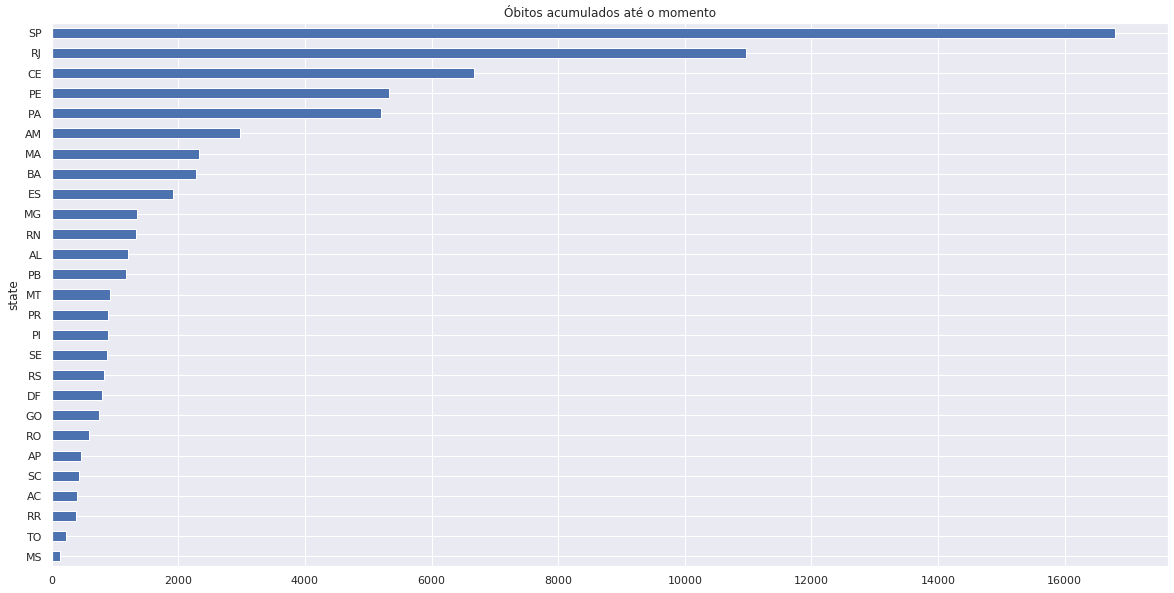

In [25]:
estados_df.iloc[-1]["deaths"].sort_values().plot.barh(title="Óbitos acumulados até o momento")

In [26]:
estado2sigla = json.load(open("../dados/siglas_estados.json", "r"))
sigla2estado = {sigla : estado for (estado, sigla) in estado2sigla.items()}

In [27]:
estados = data_df[data_df["state"] != "TOTAL"]["state"].unique()

In [28]:
estado_summary = pd.DataFrame(index=estados)

In [29]:
estado_summary["casos"] = [estados_df.iloc[-1]["totalCases"][estado] for estado in estados]
estado_summary["obitos"] = [estados_df.iloc[-1]["deaths"][estado] for estado in estados]
estado_summary.rename(index=sigla2estado, inplace=True)

In [30]:
estado_summary

,casos,obitos
São Paulo,341365.0,16788.0
Rio de Janeiro,126329.0,10970.0
Bahia,95536.0,2277.0
Espírito Santo,58537.0,1911.0
Distrito Federal,64314.0,801.0
Alagoas,42322.0,1213.0
Minas Gerais,64035.0,1355.0
Rio Grande do Sul,35557.0,825.0
Goiás,33367.0,748.0
Pernambuco,67604.0,5323.0


In [31]:
estado_summary.to_excel("../dados/processados/casos_obitos_por_estado.xlsx")